<a href="https://colab.research.google.com/github/AJ-21cm/AJ-21cm/blob/main/Traffic_Flow_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
import os

py_file_location = "/content/drive/My Drive/MS_thesis_work/"
sys.path.append(os.path.abspath(py_file_location))

In [ ]:
import plotting_fun
help(plotting_fun)

Help on module plotting_fun:

NAME
    plotting_fun

FUNCTIONS
    Box_Plot(xarr, xlabel, ylabel, title, label, font_dict, fsize)
    
    HistoGram(array, bins, normalized, width, xlabel, ylabel, alingm, title, font_dict, fsize)
    
    XY_plotting(x, y, xlabel, ylabel, title, linestyle, linewidth, color, font_dict, fsize)
    
    loadData(file_name)
    
    plotting_CTRW_TimeSeries(degree, TimeS_dict, node, font_dict, fsize)
    
    plotting_DTRW_timeSeries(degree, TimeS_dict, node, font_dict, fsize)
    
    scatter_plot(xarr, yarr, xlabel, ylabel, title, dotsize, opacity, marker, font_dict)
    
    storeData(db, file_name)

FILE
    /content/drive/My Drive/MS_thesis_work/plotting_fun.py




In [ ]:
city_name="_Delhi_"

In [ ]:
length_dict=plotting_fun.loadData("/content/drive/MyDrive/MS_thesis_work/SG_Edge_length"+city_name)

#Traffic Stream Models
##Greenshield’s macroscopic stream model

Macroscopic stream models represent how the behaviour of one parameter of traffic flow changes with respect to another. Most important among them is the relation between speed and density.Greenshield proposed the first and most simple relation between them. He assumed a linear speed-density relationship as illustrated in figure below to derive the model.
<center>
$\begin{equation}
v = v_f - \Bigl[ \frac{v_f}{k_{jam}}\Bigr]k
\end{equation}$
</center>

where $v_f$ is the free flow speed, k is vehicular density and $k_{jam}$ is vehicular density at jam condition.
when density becomes zero, speed approaches free flow speed (ie. v  $\rightarrow$  $v_f$ as k $\rightarrow$ 0)

###<u>Flow</u>
Flow of vehicles is given by
<center>
q=kv
</center>
Relation between flow and density is given by
<center>
$q= kv_f - \Bigl[ \frac{v_f}{k_{jam}}\Bigr]k^2$
</center>
Relation between flow and speed is given by
<center>
$q= k_{jam}v - \Bigl[ \frac{k_{jam}}{v_f}\Bigr]v^2$
</center>

### <u>Density corresponding to maximum flow</u>
we can calculate the density at which fflow is maximum.<br>
Put $\frac{dq}{dk}=0$
<br>
we get $k_{0}=\frac{k_{jam}}{2}$
<br>
so maximum flow is $q_{max}=\frac{v_f k_{jam}}{4}$
<br>
velocity at maximum flow can be obtain by putting $k=k_0$, $v_0 = \frac{v_f}{2}$



In [ ]:
def Greenshield_model(vh,kj,k):
  return vh*(1-(k/kj))

In [ ]:
font = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 25}
plt.xlabel(xlabel,font)
plt.grid(alpha=0.4)
plt.legend(fontsize=15,markerscale=2)
plt.ylabel(ylabel,font)
#plt.xlim(-100,1000)
#plt.xscale("log")
#plt.yscale("log")
plt.tick_params(bottom=True, top=True, left=True, right=True,length=6, width=1.5)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,length=6, width=1.5)
ax.spines[['left','right','bottom','top']].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
#fig.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

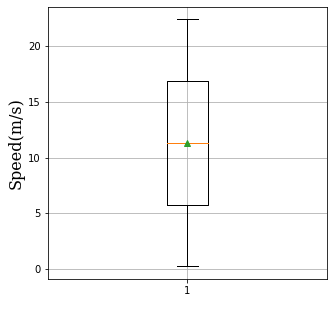

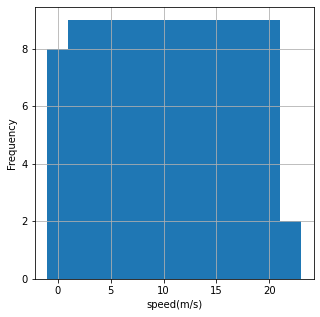

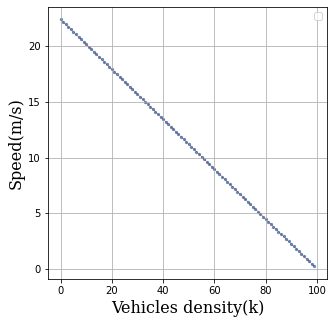

In [ ]:
kj=100
vh=80
k=np.arange(0,kj)
vel=0.28*np.array(Greenshield_model(vh,kj,k))
font_dict = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 16}
#plotting_fun.Box_Plot(vel, " ", "Speed(m/s)", "", None, font_dict, (5,5))
plt.boxplot(vel,showmeans=True,labels="",notch=None, sym=None, vert=None, whis=None, positions=None, widths=None)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
bins=np.arange(0,25,2)
#plotting_fun.HistoGram(vel,bins,False,1,"speed(m/s)","Frequency","left","",{},(5,5))
plt.show()

fig=plt.figure(figsize=(8,6))
ax = fig.gca()
#plotting_fun.XY_plotting(k, vel, "Vehicles density(k)", "Speed(km/h)","", '--', 0.5, 'r', font_dict, (5,5))
#plotting_fun.scatter_plot(k, vel, "Vehicles density(k)", "Speed(m/s)", "", 5, 0.7, "o", font_dict)
plt.scatter(k,vel,s=30)
plt.grid()
plt.ylabel("v(m/s)",font)
plt.ylabel("k",font)
plt.tick_params(bottom=True, top=True, left=True, right=True,length=6, width=1.5)
plt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,length=6, width=1.5)
ax.spines[['left','right','bottom','top']].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
#fig.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

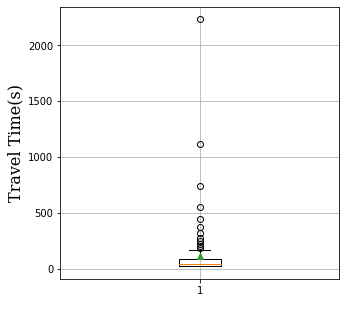

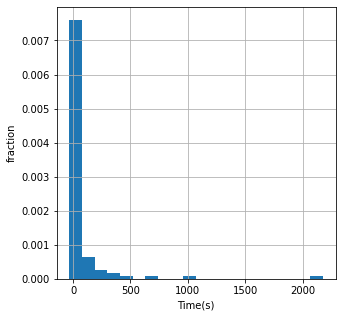

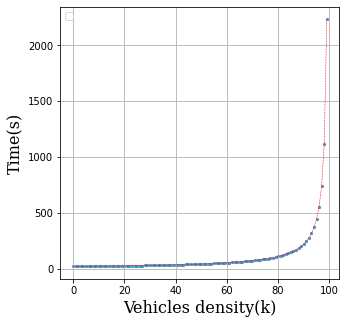

In [ ]:
time=np.round_(500/vel,1)
#bins=[i/10 for i in range(3000)]
plotting_fun.Box_Plot(time, " ", "Travel Time(s)", "", None, font_dict, (5,5))
plt.show()
plotting_fun.HistoGram(time,20,True,1,"Time(s)","fraction","left","",{},(5,5))
plt.show()
plotting_fun.XY_plotting(k, time, "Vehicles density(k)", "Time(s)","", '--', 0.5, 'r', font_dict, (5,5))
plotting_fun.scatter_plot(k, time, "Vehicles density(k)", "Time(s)", "", 5, 0.7, "o", font_dict)
plt.grid()

In [ ]:
time

array([ 4.3,  4.8,  5.4,  6.2,  7.2,  8.7, 10.9, 14.5, 21.7, 43.4])

In [ ]:
5/18

0.2777777777777778

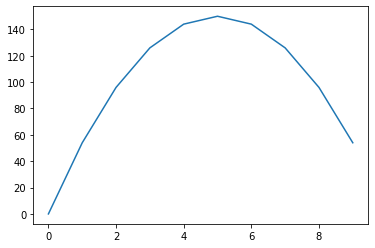

In [ ]:
q=k*vel
plt.plot(k,q)

#Greenberg’s logarithmic model
<ul>
<li>Greenberg assumed a logarithmic relation between speed and density.</li>
<center>
$v=v_0ln\Bigl[\frac{k_{jam}}{k} \Bigr]$
</center>
<li>The model has gained very good popularity because this model can be derived analytically.</li>
<li>Main drawbacks of this model is that as density tends to zero, speed tends to infinity. This shows the inability of the model to predict the speeds at lower densities.</li>
</ul>

In [ ]:
def Mod_Greenberg_log_Model(vh,kj,k):
  if k==0:
    return 1.01*vh*np.log(kj)
  else:
    return vh*np.log(kj/k)

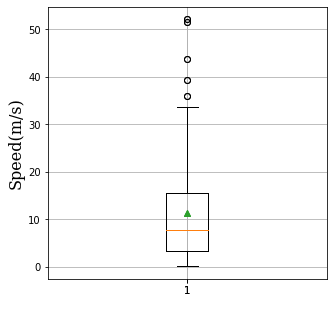

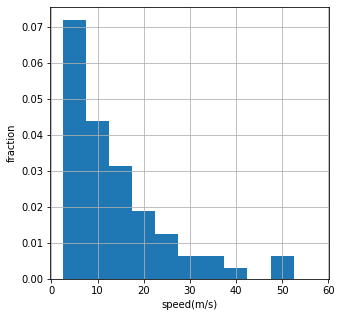

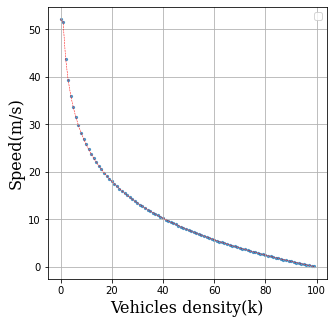

In [ ]:
kj=100
vh=40
k=np.arange(0,kj)
vel=0.28*np.array([Mod_Greenberg_log_Model(vh,kj,i) for i in k])
font_dict = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 16}
plotting_fun.Box_Plot(vel, " ", "Speed(m/s)", "", None, font_dict, (5,5))
plt.boxplot(vel,showmeans=True,meanline=False)
plt.show()
bins=np.arange(5,65,5)
plotting_fun.HistoGram(vel,bins,True,1,"speed(m/s)","fraction","left","",{},(5,5))
plt.show()
plotting_fun.XY_plotting(k, vel, "Vehicles density(k)", "Speed(km/h)","", '--', 0.5, 'r', font_dict, (5,5))
plotting_fun.scatter_plot(k, vel, "Vehicles density(k)", "Speed(m/s)", "", 5, 0.7, "o", font_dict)
plt.grid()

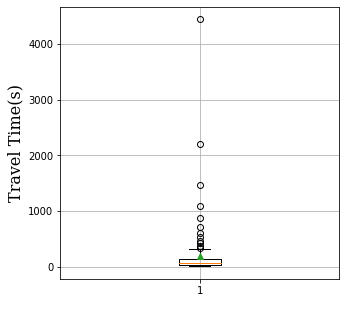

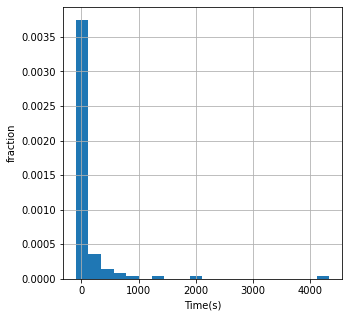

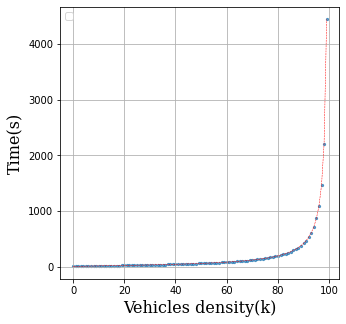

In [ ]:
time=np.round_(500/vel,1)
#bins=[i/10 for i in range(3000)]
plotting_fun.Box_Plot(time, " ", "Travel Time(s)", "", None, font_dict, (5,5))
plt.show()
plotting_fun.HistoGram(time,20,True,1,"Time(s)","fraction","left","",{},(5,5))
plt.show()
plotting_fun.XY_plotting(k, time, "Vehicles density(k)", "Time(s)","", '--', 0.5, 'r', font_dict, (5,5))
plotting_fun.scatter_plot(k, time, "Vehicles density(k)", "Time(s)", "", 5, 0.7, "o", font_dict)
plt.grid()

array([184.23180744, 184.20680744, 156.48092022, 140.26231589,
       128.75503299, 119.82929094, 112.53642867, 106.37040148,
       101.02914577,  96.31782435,  92.10340372,  88.29099653,
        84.81054145,  81.60883314,  78.64451425,  75.8847994 ,
        73.30325855,  70.87827368,  68.59193712,  66.42924827,
        64.3775165 ,  62.42590993,  60.56510931,  58.7870388 ,
        57.08465423,  55.45177444,  53.88294592,  52.3733328 ,
        50.91862703,  49.51497424,  48.15891217,  46.84731926,
        45.57737133,  44.34650498,  43.15238645,  41.99288498,
        40.8660499 ,  39.77009093,  38.70336105,  37.66434159,
        36.65162927,  35.66392477,  34.70002271,  33.75880281,
        32.83922208,  31.94030785,  31.06115158,  30.20090337,
        29.358767  ,  28.53399552,  27.72588722,  26.93378213,
        26.1570587 ,  25.3951309 ,  24.64744558,  23.91348003,
        23.19273981,  22.48475673,  21.78908702,  21.10530968,
        20.43302495,  19.77185287,  19.12143204,  18.48

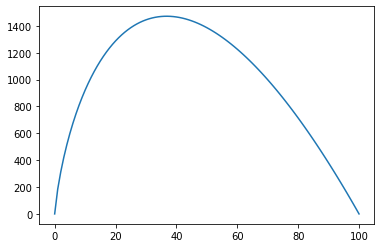

In [ ]:
q=k*vel
plt.plot(k,q)


#Underwood’s exponential model
To overcome the limitation of Greenberg’s model, Underwood proposed an exponential model as shown below.
<center>$v=v_fe^{-\frac{k}{k_{jam}}}$</center>

where $k_{jam}$ is the optimal density i.e. the density corresponding to the maximum flow. $v_f$ is free flow speed.

In this model, speed becomes zero only when density reaches infinity which is the drawback of this model. Hence this cannot be used for predicting speeds at high densities.

In [ ]:
def mod_Underwood_Expon_Model(vh,kj,k):
  if k<kj:
    return vh*np.exp(-k/kj)
  else:
    return 0

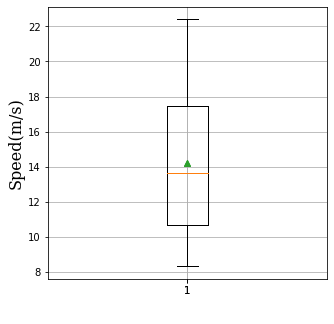

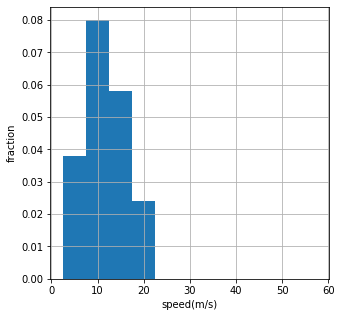

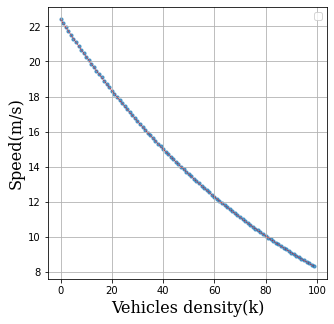

In [ ]:
kj=100
vh=80
k=np.arange(0,kj)
vel=0.28*np.array([mod_Underwood_Expon_Model(vh,kj,i) for i in k])
font_dict = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 16}
plotting_fun.Box_Plot(vel, " ", "Speed(m/s)", "", None, font_dict, (5,5))
plt.boxplot(vel,showmeans=True,meanline=False)
plt.show()
bins=np.arange(5,65,5)
plotting_fun.HistoGram(vel,bins,True,1,"speed(m/s)","fraction","left","",{},(5,5))
plt.show()
plotting_fun.XY_plotting(k, vel, "Vehicles density(k)", "Speed(m/s)","", '--', 0.5, 'r', font_dict, (5,5))
plt.grid()
plotting_fun.scatter_plot(k, vel, "Vehicles density(k)", "Speed(m/s)", "", 10, 0.7, "o", font_dict)

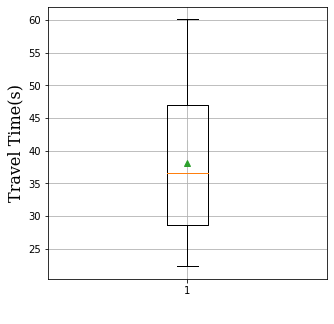

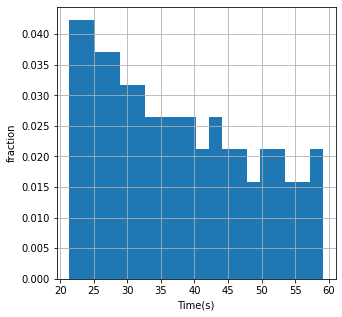

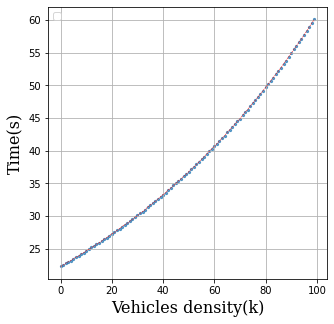

In [ ]:
time=np.round_(500/vel,1)
#bins=[i/10 for i in range(3000)]
plotting_fun.Box_Plot(time, " ", "Travel Time(s)", "", None, font_dict, (5,5))
plt.show()
plotting_fun.HistoGram(time,20,True,1,"Time(s)","fraction","left","",{},(5,5))
plt.show()
plotting_fun.XY_plotting(k, time, "Vehicles density(k)", "Time(s)","", '--', 0.5, 'r', font_dict, (5,5))
plotting_fun.scatter_plot(k, time, "Vehicles density(k)", "Time(s)", "", 5, 0.7, "o", font_dict)
plt.grid()

In [ ]:
vel=0.288*vel
time=np.round_(100/vel,1)
bins=[i for i in range(500)]
#plt.xticks(bins)
#plt.hist(time,bins)
#plotting_fun.HistoGram(time,bins,True,1,"Time(s)","fraction","left","",{},(5,5))


In [ ]:
time

array([ 52.3,  52.9,  53.4,  53.9,  54.5,  55. ,  55.6,  56.1,  56.7,
        57.3,  57.8,  58.4,  59. ,  59.6,  60.2,  60.8,  61.4,  62. ,
        62.6,  63.3,  63.9,  64.6,  65.2,  65.9,  66.5,  67.2,  67.9,
        68.5,  69.2,  69.9,  70.6,  71.3,  72.1,  72.8,  73.5,  74.3,
        75. ,  75.8,  76.5,  77.3,  78.1,  78.8,  79.6,  80.4,  81.2,
        82.1,  82.9,  83.7,  84.6,  85.4,  86.3,  87.1,  88. ,  88.9,
        89.8,  90.7,  91.6,  92.5,  93.5,  94.4,  95.3,  96.3,  97.3,
        98.3,  99.2, 100.2, 101.2, 102.3, 103.3, 104.3, 105.4, 106.4,
       107.5, 108.6, 109.7, 110.8, 111.9, 113. , 114.2, 115.3, 116.5,
       117.6, 118.8, 120. , 121.2, 122.4, 123.7, 124.9, 126.2, 127.4,
       128.7, 130. , 131.3, 132.6, 134. , 135.3, 136.7, 138. , 139.4,
       140.8])

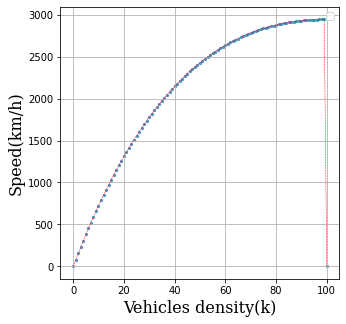

In [ ]:
q=k*vel
plotting_fun.XY_plotting(k, q, "Vehicles density(k)", "Flow(km/h)","", '--', 0.5, 'r', font_dict, (5,5))
plotting_fun.scatter_plot(k, q, "Vehicles density(k)", "Flow(km/h)", "", 5, 0.7, "o", font_dict)
plt.grid()

#Pipes’ generalized model
Further developments were made with the introduction of a new parameter (n) to provide for a more generalized modeling approach. Pipes proposed a model shown by the following equation.
<center>$v = v_f \Bigl[ 1-\Bigl(\frac{k}{k_{jam}}\Bigr)^n\Bigr]$</center>

When n is set to one, Pipe’s model resembles Greenshield’s model. Thus by varying the values of n, a family of models can be developed.

In [ ]:
def Pipes_generalized_model(vh,kj,k,n):
  return vh*(1-(k/kj)**n)

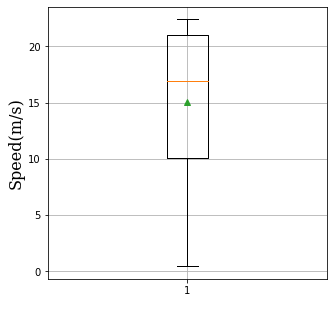

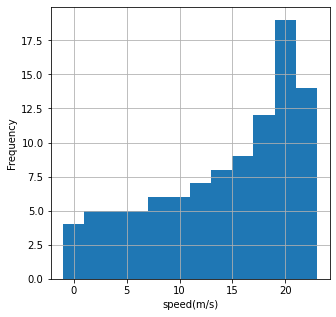

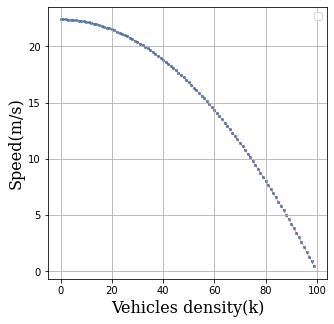

In [ ]:
kj=100
vh=80
k=np.arange(0,kj)
n=2
vel=0.28*np.array(Pipes_generalized_model(vh,kj,k,n))
font_dict = {'family': 'serif',
         'color':  'black',
        'weight': 'normal',
        'size': 16}
plotting_fun.Box_Plot(vel, " ", "Speed(m/s)", "", None, font_dict, (5,5))
#plt.boxplot(vel,showmeans=True,meanline=False)
plt.show()
bins=np.arange(0,25,2)
plotting_fun.HistoGram(vel,bins,False,1,"speed(m/s)","Frequency","left","",{},(5,5))
plt.show()
plotting_fun.XY_plotting(k, vel, "Vehicles density(k)", "Speed(km/h)","", '--', 0.5, 'r', font_dict, (5,5))
plotting_fun.scatter_plot(k, vel, "Vehicles density(k)", "Speed(m/s)", "", 5, 0.7, "o", font_dict)
plt.grid()

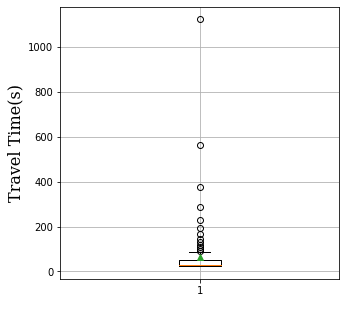

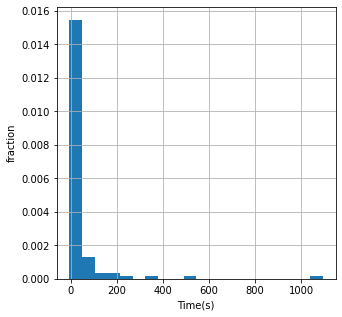

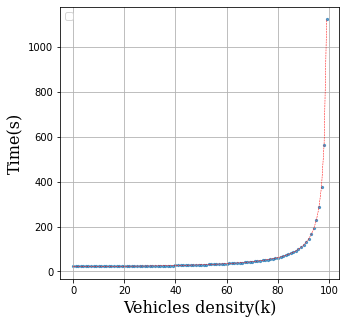

In [ ]:
time=np.round_(500/vel,1)
#bins=[i/10 for i in range(3000)]
plotting_fun.Box_Plot(time, " ", "Travel Time(s)", "", None, font_dict, (5,5))
plt.show()
plotting_fun.HistoGram(time,20,True,1,"Time(s)","fraction","left","",{},(5,5))
plt.show()
plotting_fun.XY_plotting(k, time, "Vehicles density(k)", "Time(s)","", '--', 0.5, 'r', font_dict, (5,5))
plotting_fun.scatter_plot(k, time, "Vehicles density(k)", "Time(s)", "", 5, 0.7, "o", font_dict)
plt.grid()

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [ ]:
df["name"].unique().size

3

In [ ]:
a1=np.array([np.arange(2,8)])
a2=np.array([np.arange(9,15)])
a3=np.array([np.arange(22,28)])
a4=np.array([np.arange(30,36)])
np.concatenate((a1,a2,a3,a4),axis=1,out=None,dtype=None)

array([[ 2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 22, 23, 24, 25,
        26, 27, 30, 31, 32, 33, 34, 35]])

In [ ]:
df2=df.dropna(axis=0,how="any",thresh=None, subset=None,inplace=False)
df2

,name,toy,born
1,Batman,Batmobile,1940-04-25
